# **AAPL Stock Price Analysis with ARIMA**


# 📦 Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 📊 Load and Prepare AAPL Stock Data


In [2]:
data = pd.read_parquet("../data/processed/cleaned_stocks.parquet")
aapl = data[data['ticker']=='AAPL'].set_index('date')['close'] 
print(f"Data type: {type(aapl)}") 
print(f"Shape: {aapl.shape}")  

Data type: <class 'pandas.core.series.Series'>
Shape: (337,)


# 📈 Plot AAPL Closing Prices


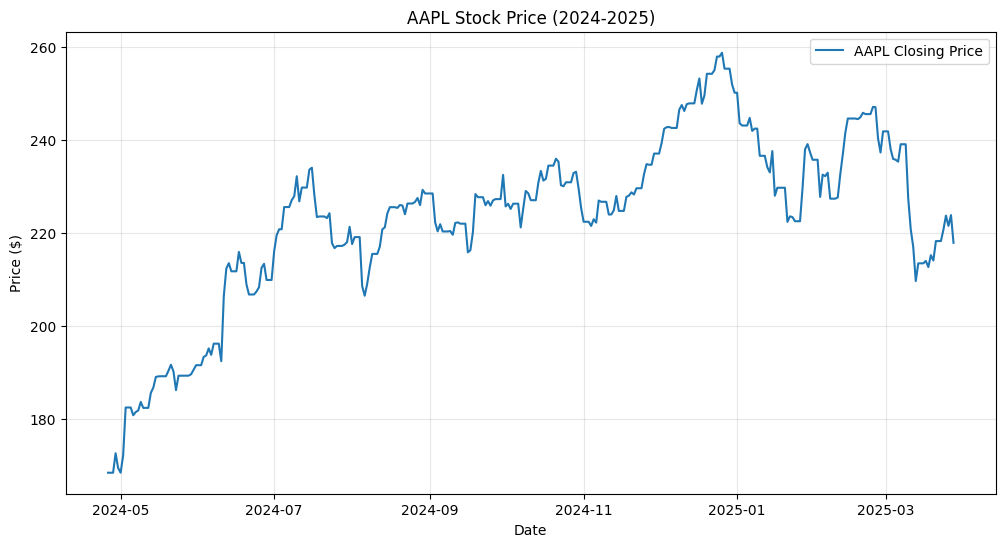

ADF Statistic: -2.9741721727381094
p-value: 0.037377809146013456
Critical Values: {'1%': -3.449962981927952, '5%': -2.870180642420163, '10%': -2.5713734527352607}


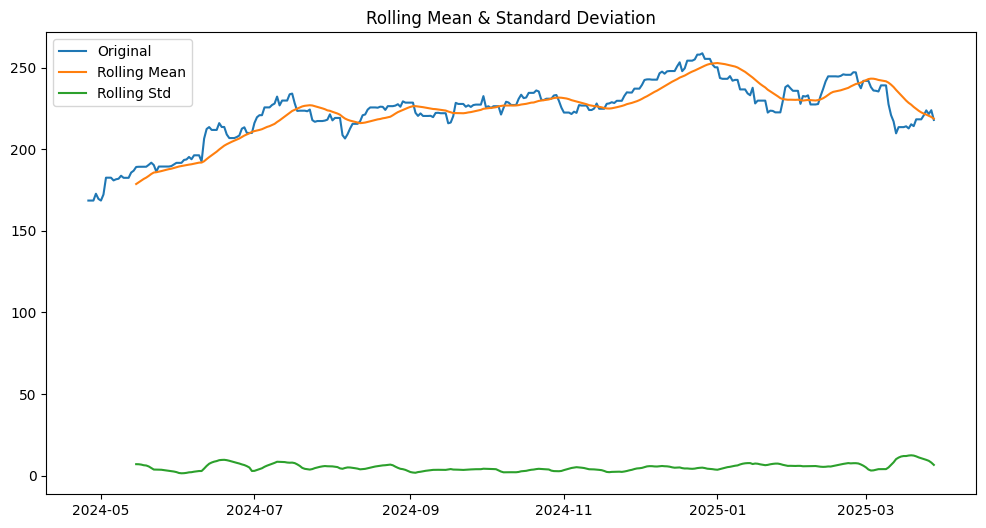

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(aapl, label='AAPL Closing Price')
plt.title('AAPL Stock Price (2024-2025)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

def test_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
    rolling_mean = series.rolling(window=20).mean()
    rolling_std = series.rolling(window=20).std()
    
    plt.figure(figsize=(12, 6))
    plt.plot(series, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

test_stationarity(aapl)

ADF Statistic: -16.848058201174386
p-value: 1.1243788181779091e-29
Critical Values: {'1%': -3.4500219858626227, '5%': -2.870206553997666, '10%': -2.571387268879483}


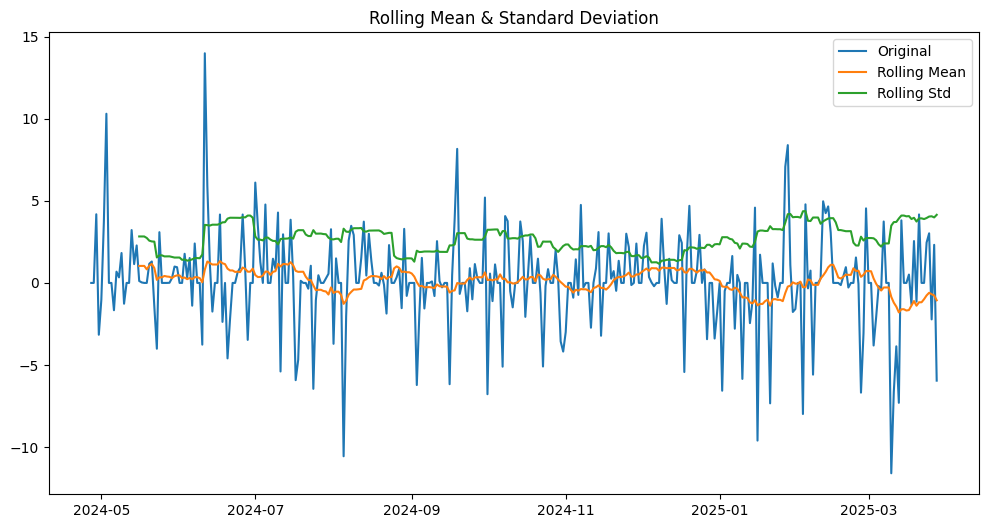

ADF Statistic: -16.823929100339388
p-value: 1.1723159875690905e-29
Critical Values: {'1%': -3.4500219858626227, '5%': -2.870206553997666, '10%': -2.571387268879483}


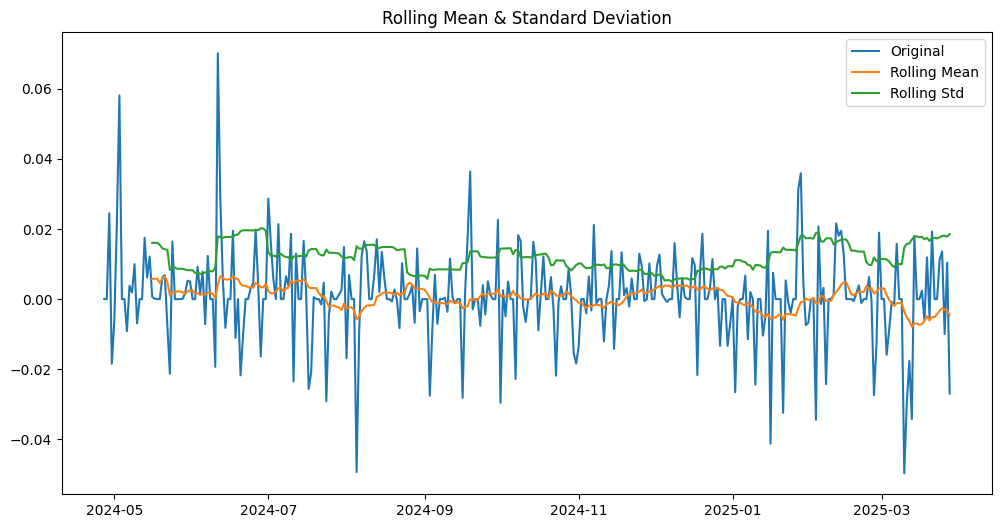

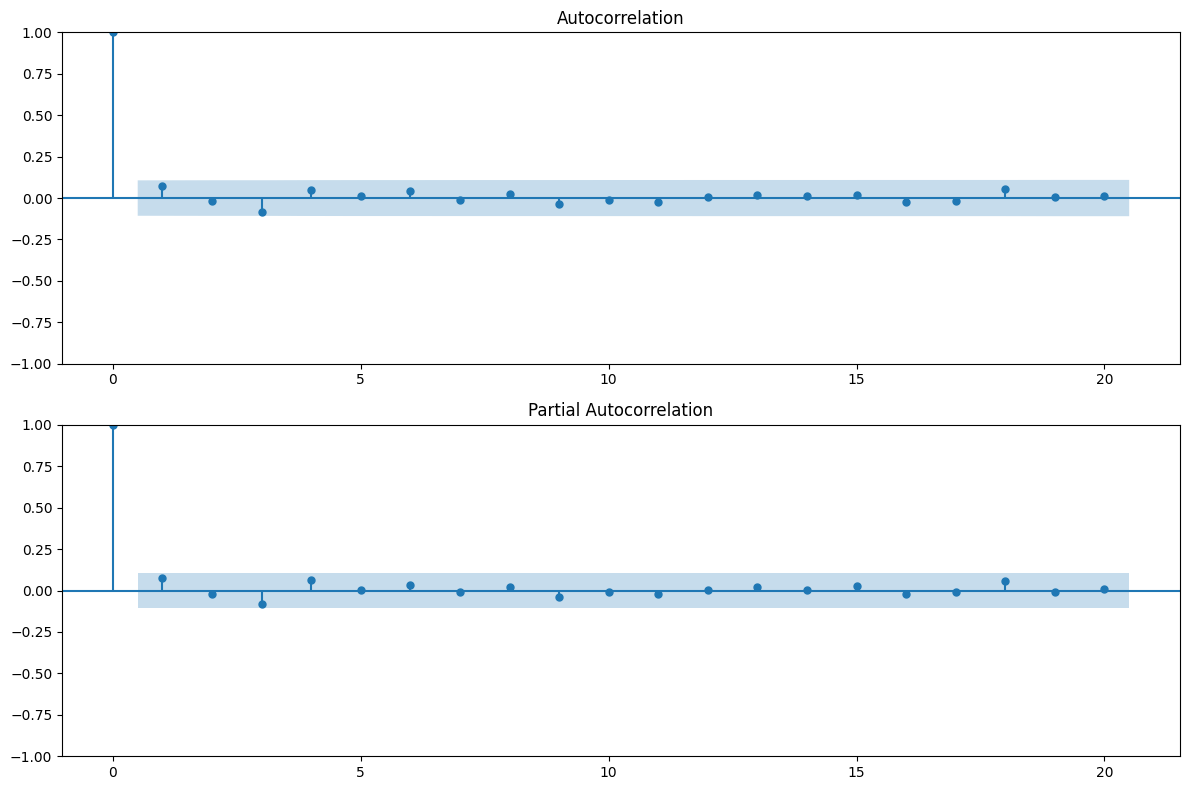

In [4]:
aapl_diff = aapl.diff().dropna()
test_stationarity(aapl_diff)

aapl_log = np.log(aapl)
aapl_log_diff = aapl_log.diff().dropna()
test_stationarity(aapl_log_diff)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(aapl_log_diff, lags=20, ax=ax1)
plot_pacf(aapl_log_diff, lags=20, ax=ax2)
plt.tight_layout()
plt.show()

# 🧪 Define Function to Test Stationarity (ADF Test + Rolling Stats)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

def test_stationarity(series):
    """Augmented Dickey-Fuller test with rolling statistics plot"""
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)
    
    rolmean = series.rolling(window=20).mean()
    rolstd = series.rolling(window=20).std()
    
    plt.figure(figsize=(12, 6))
    plt.plot(series, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

# 🧪 Test Stationarity of Original Series


Results of Dickey-Fuller Test:
Test Statistic                  -2.974172
p-value                          0.037378
#Lags Used                       0.000000
Number of Observations Used    336.000000
Critical Value (1%)             -3.449963
Critical Value (5%)             -2.870181
Critical Value (10%)            -2.571373
dtype: float64


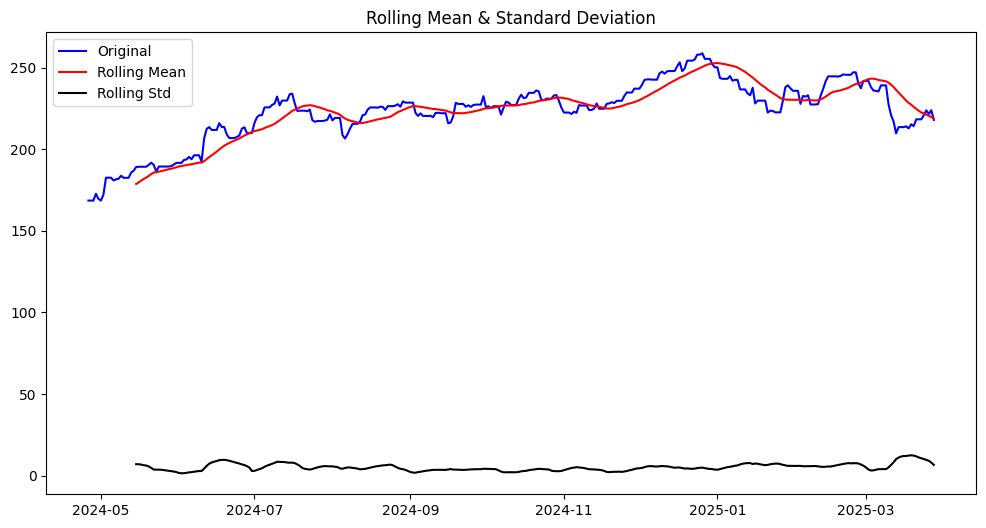

In [6]:
test_stationarity(aapl)


# 🔁 First-Order Differencing and Stationarity Test


Results of Dickey-Fuller Test:
Test Statistic                -1.684806e+01
p-value                        1.124379e-29
#Lags Used                     0.000000e+00
Number of Observations Used    3.350000e+02
Critical Value (1%)           -3.450022e+00
Critical Value (5%)           -2.870207e+00
Critical Value (10%)          -2.571387e+00
dtype: float64


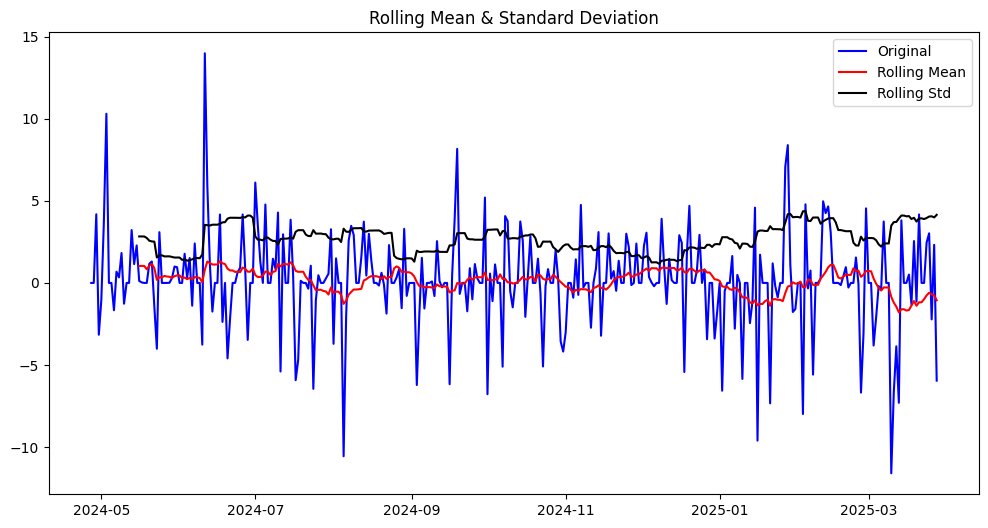

In [7]:
aapl_diff = aapl.diff().dropna()
test_stationarity(aapl_diff)

# 🔁 Log Transform + Differencing and Stationarity Test


Results of Dickey-Fuller Test:
Test Statistic                -1.682393e+01
p-value                        1.172316e-29
#Lags Used                     0.000000e+00
Number of Observations Used    3.350000e+02
Critical Value (1%)           -3.450022e+00
Critical Value (5%)           -2.870207e+00
Critical Value (10%)          -2.571387e+00
dtype: float64


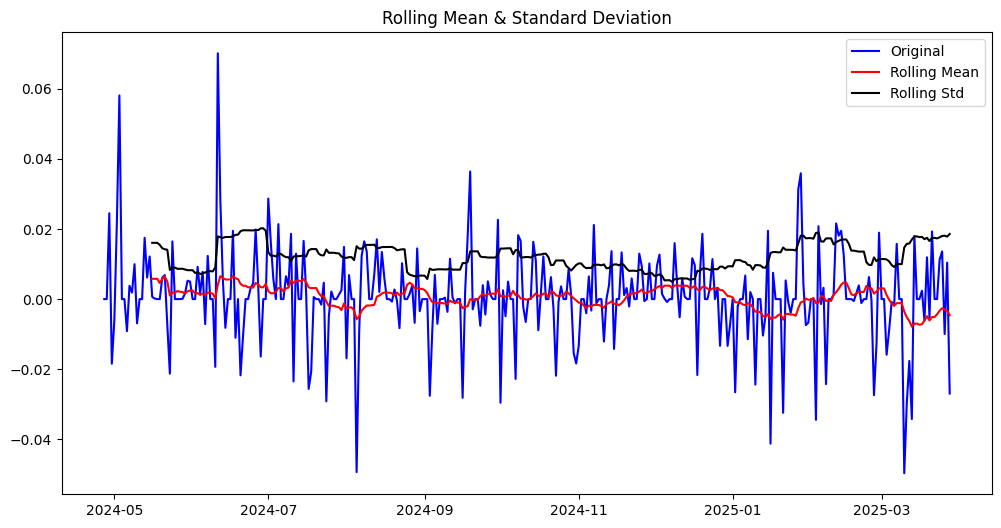

In [8]:
aapl_log = np.log(aapl)
aapl_log_diff = aapl_log.diff().dropna()
test_stationarity(aapl_log_diff)

# 🔎 ACF and PACF Plots (Log-Differenced Series)


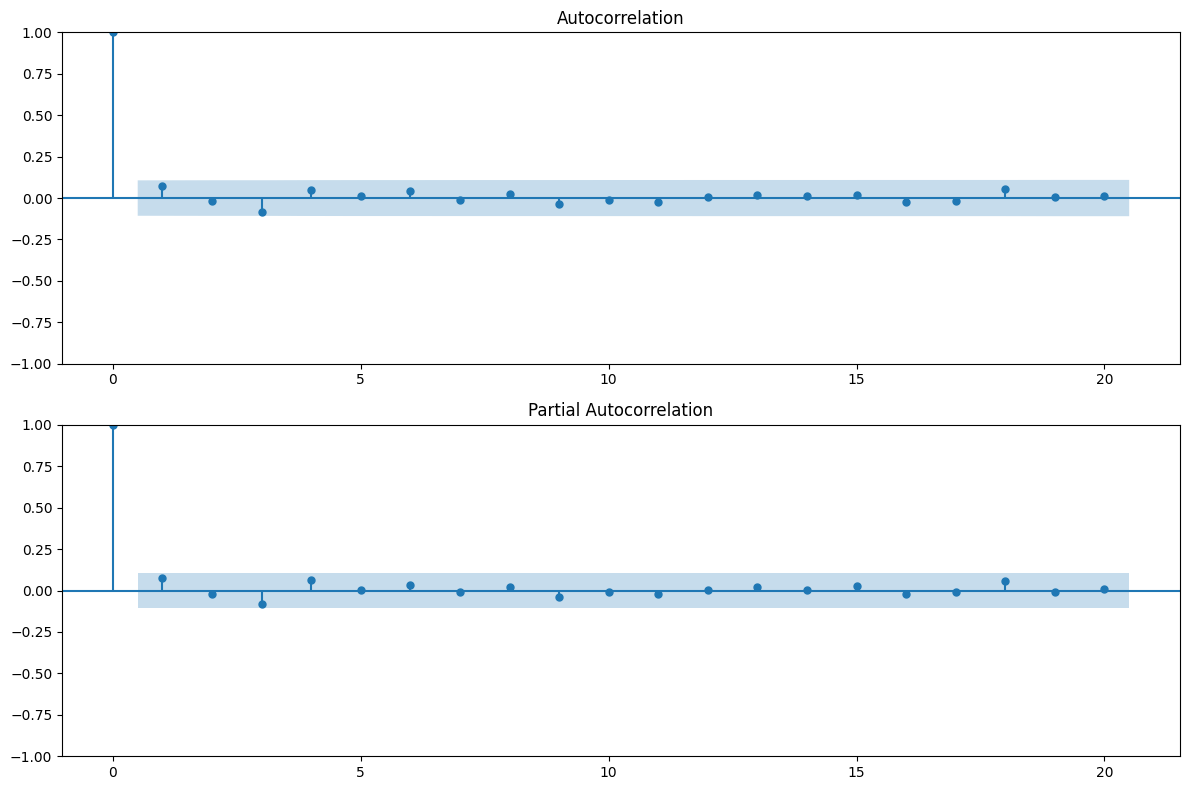

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(aapl_log_diff, lags=20, ax=ax1)
plot_pacf(aapl_log_diff, lags=20, ax=ax2)
plt.tight_layout()
plt.show()

# 🧪 Redefined Stationarity Test with Better Output Formatting


In [10]:
def test_stationarity(series):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

    rolmean = series.rolling(window=20).mean()
    rolstd = series.rolling(window=20).std()
    
    plt.figure(figsize=(12, 6))
    plt.plot(series, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

# 📊 Complete Analysis Function for AAPL Stock


In [11]:
def analyze_aapl_stock(df):
    """Perform complete time series analysis for AAPL"""
    print("\nAnalyzing AAPL...")    
    try:
        decomposition = seasonal_decompose(aapl, model='multiplicative', period=20)
        decomposition.plot()
        plt.suptitle('AAPL Time Series Decomposition')
        plt.tight_layout()
        plt.savefig('./visualizations/aapl_decomposition.png')
        plt.close()
    except Exception as e:
        print(f"Decomposition failed: {str(e)}")
    
    print("\nOriginal Series Stationarity Test:")
    test_stationarity(aapl)
    
    log_diff = np.log(aapl).diff().dropna()
    print("\nAfter Log Differencing Stationarity Test:")
    
    
    test_stationarity(log_diff)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(log_diff, lags=20, ax=ax1)
    plot_pacf(log_diff, lags=20, ax=ax2)
    plt.suptitle('AAPL ACF and PACF Plots (Log Differenced)')
    plt.tight_layout()
    plt.savefig('./visualizations/aapl_acf_pacf.png')
    plt.close()
    
    return {
        'ticker': 'AAPL',
        'original_stationary': adfuller(aapl)[1] < 0.05,
        'diff_stationary': adfuller(aapl.diff().dropna())[1] < 0.05,
        'log_diff_stationary': adfuller(log_diff)[1] < 0.05,
        'suggested_diff': 1 if adfuller(log_diff)[1] < 0.05 else 2
    }


# 📋 Run AAPL Analysis & Display Stationarity Summary



Analyzing AAPL...

Original Series Stationarity Test:
Results of Dickey-Fuller Test:
Test Statistic                  -2.974172
p-value                          0.037378
#Lags Used                       0.000000
Number of Observations Used    336.000000
Critical Value (1%)             -3.449963
Critical Value (5%)             -2.870181
Critical Value (10%)            -2.571373
dtype: float64


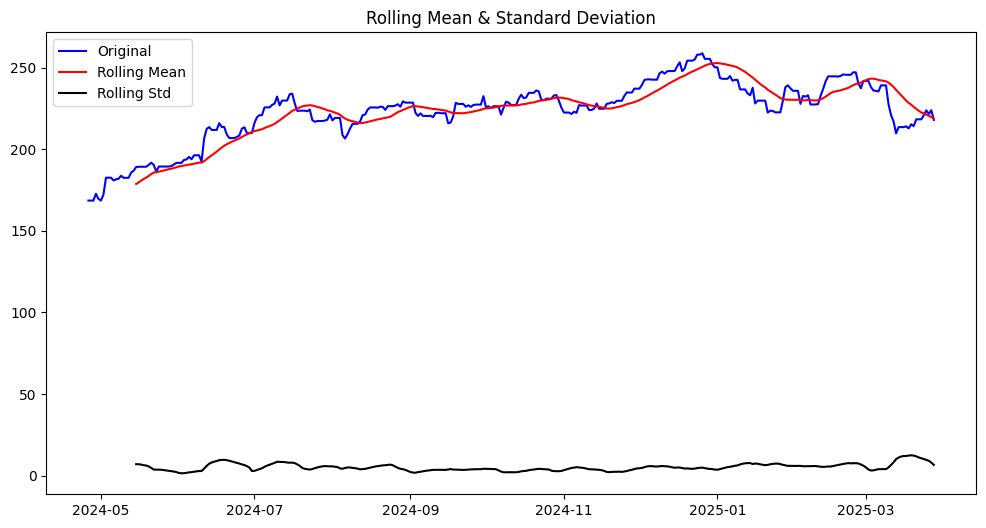


After Log Differencing Stationarity Test:
Results of Dickey-Fuller Test:
Test Statistic                -1.682393e+01
p-value                        1.172316e-29
#Lags Used                     0.000000e+00
Number of Observations Used    3.350000e+02
Critical Value (1%)           -3.450022e+00
Critical Value (5%)           -2.870207e+00
Critical Value (10%)          -2.571387e+00
dtype: float64


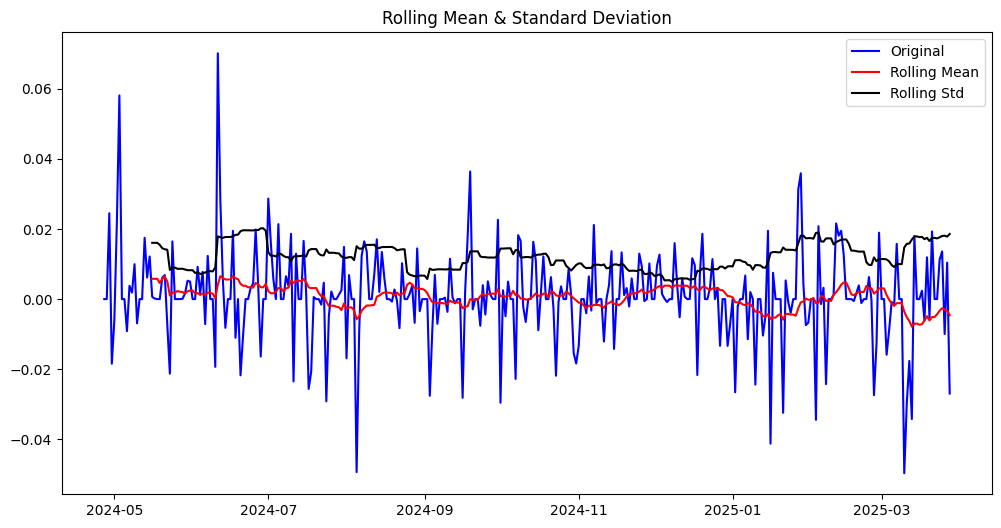


AAPL Stationarity Analysis Results:
  ticker  original_stationary  diff_stationary  log_diff_stationary  \
0   AAPL                 True             True                 True   

   suggested_diff  
0               1  


In [12]:
aapl_results = analyze_aapl_stock(aapl)

results = pd.DataFrame([aapl_results])
print("\nAAPL Stationarity Analysis Results:")
print(results)

In [13]:
train_size = int(len(aapl) * 0.8)
train, test = aapl.iloc[:train_size], aapl.iloc[train_size:]

model = ARIMA(train, order=(1,1,1)).fit()
print(model.summary())

history = train.copy()
predictions = []

for t in range(len(test)):
    pred = model.forecast(steps=1).iloc[0]
    predictions.append(pred)
    
    history = pd.concat([history, test.iloc[t:t+1]])
    model = ARIMA(history, order=(1,1,1)).fit()

predictions = pd.Series(predictions, index=test.index)

metrics = {
    'RMSE': np.sqrt(mean_squared_error(test, predictions)),
    'MAE': mean_absolute_error(test, predictions),
    'MAPE (%)': mean_absolute_percentage_error(test, predictions) * 100,
    'R²': r2_score(test, predictions)
}

print("\n╔══════════════════════════════╗")
print("║       MODEL PERFORMANCE      ║")
print("╠══════════════════╦══════════╣")
for name, val in metrics.items():
    print(f"║ {name:<18} ║ {val:>8.2f} ║") 
print("╚══════════════════╩══════════╝")

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  269
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -641.067
Date:                Wed, 09 Apr 2025   AIC                           1288.135
Time:                        14:15:08   BIC                           1298.908
Sample:                    04-26-2024   HQIC                          1292.462
                         - 01-19-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5226      4.822      0.108      0.914      -8.929       9.974
ma.L1         -0.5311      4.820     -0.110      0.912      -9.978       8.916
sigma2         7.0021      0.337     20.780      0.0

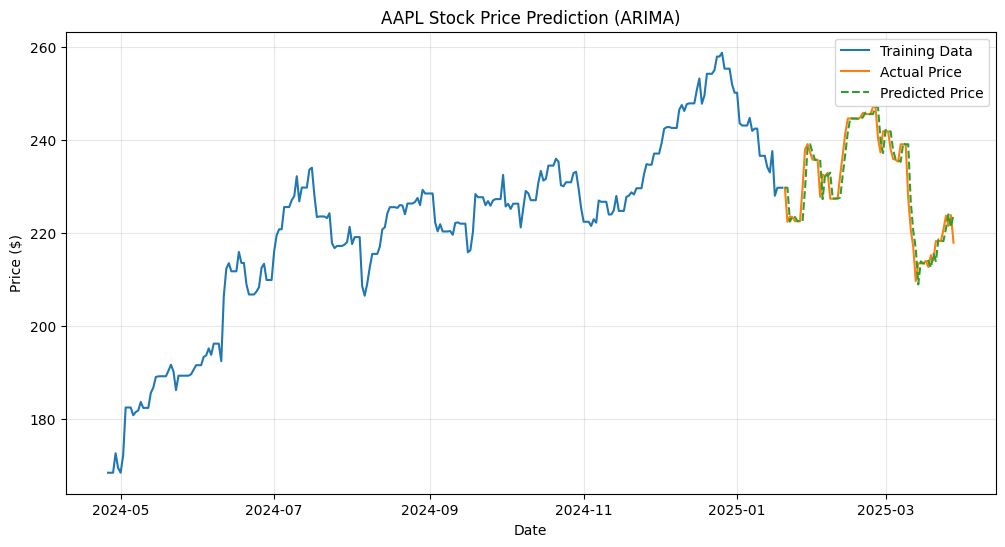

<Figure size 1200x400 with 0 Axes>

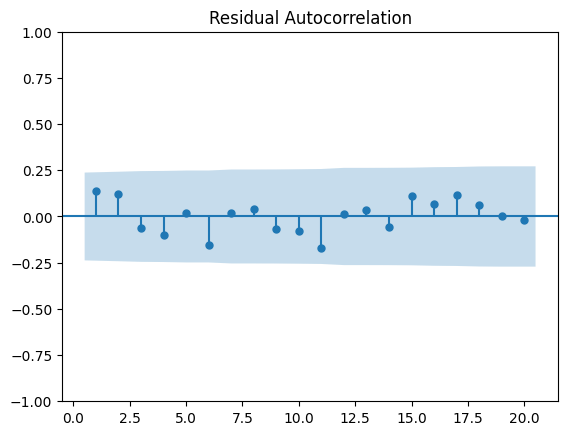

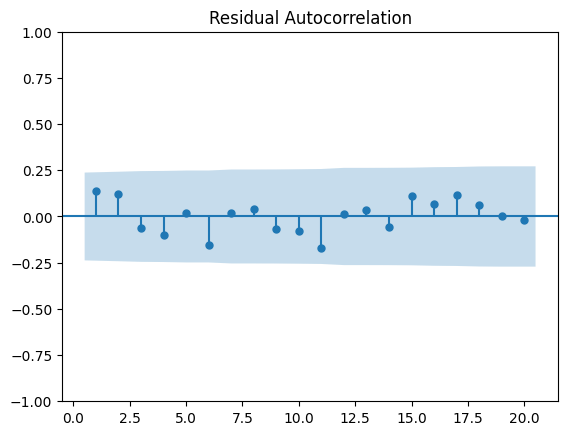

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Price')
plt.plot(predictions, label='Predicted Price', linestyle='--')
plt.title('AAPL Stock Price Prediction (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

predictions = pd.Series(predictions, index=test.index)

residuals = test - predictions

plt.figure(figsize=(12,4))
plot_acf(residuals, lags=20, zero=False)
plt.title('Residual Autocorrelation')
plt.show()

plot_acf(residuals.values, lags=20, zero=False)  
plt.title('Residual Autocorrelation')
plt.show()

# 📤 Train-Test Split


In [15]:
train_size = int(len(aapl) * 0.8)
train, test = aapl.iloc[:train_size], aapl.iloc[train_size:]

# 🔧 Fit ARIMA Model on Training Data


In [16]:

train_values = train.values
test_values = test.values

model = ARIMA(train_values, order=(1,1,1)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  269
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -641.067
Date:                Wed, 09 Apr 2025   AIC                           1288.135
Time:                        14:15:11   BIC                           1298.908
Sample:                             0   HQIC                          1292.462
                                - 269                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5226      4.822      0.108      0.914      -8.929       9.974
ma.L1         -0.5311      4.820     -0.110      0.912      -9.978       8.916
sigma2         7.0021      0.337     20.780      0.0

# 🔁 Rolling Forecasting with Retraining on Each Step


In [17]:


train_values = train.values
test_values = test.values

model = ARIMA(train_values, order=(1,1,1)).fit()
print(model.summary())

history = [x for x in train_values]  
predictions = []

for t in range(len(test_values)):
    model = ARIMA(history, order=(1,1,1)).fit()
    pred = model.forecast()[0]
    predictions.append(pred)
    history.append(test_values[t]) 
    


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  269
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -641.067
Date:                Wed, 09 Apr 2025   AIC                           1288.135
Time:                        14:15:11   BIC                           1298.908
Sample:                             0   HQIC                          1292.462
                                - 269                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5226      4.822      0.108      0.914      -8.929       9.974
ma.L1         -0.5311      4.820     -0.110      0.912      -9.978       8.916
sigma2         7.0021      0.337     20.780      0.0

# 📊 Model Performance Evaluation


In [18]:
metrics = {
    'RMSE': np.sqrt(mean_squared_error(test, predictions)),
    'MAE': mean_absolute_error(test, predictions),
    'MAPE (%)': mean_absolute_percentage_error(test, predictions) * 100,
    'R²': r2_score(test, predictions)
}

print("\n╔══════════════════════════════╗")
print("║       MODEL PERFORMANCE      ║")
print("╠══════════════════╦══════════╣")
for name, val in metrics.items():
    print(f"║ {name:<18} ║ {val:>8.2f} ║") 
print("╚══════════════════╩══════════╝")


╔══════════════════════════════╗
║       MODEL PERFORMANCE      ║
╠══════════════════╦══════════╣
║ RMSE               ║     3.50 ║
║ MAE                ║     2.27 ║
║ MAPE (%)           ║     1.00 ║
║ R²                 ║     0.89 ║
╚══════════════════╩══════════╝


# 📊 Plot Forecast vs Actual for ARIMA(1,1,1)


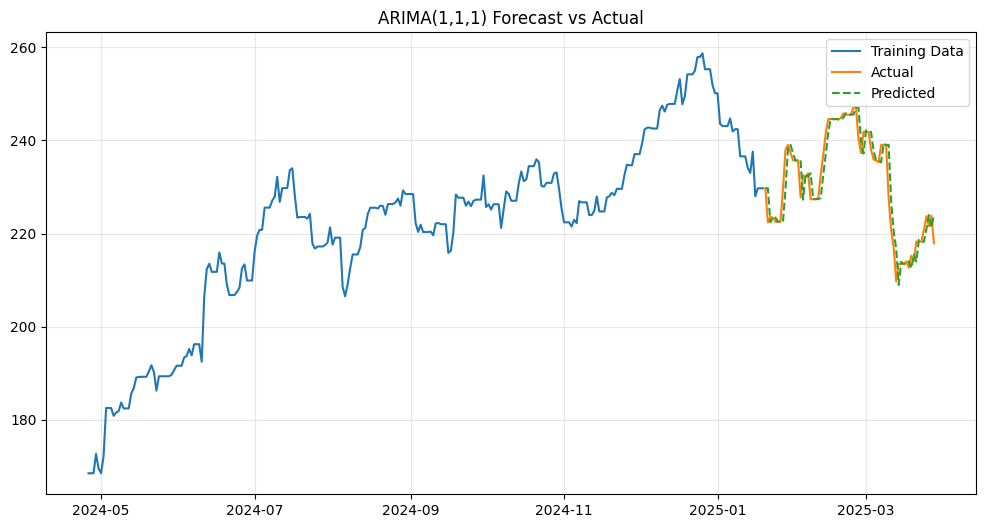

In [19]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', linestyle='--')
plt.title('ARIMA(1,1,1) Forecast vs Actual')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 📉 Plot Residuals Over Time


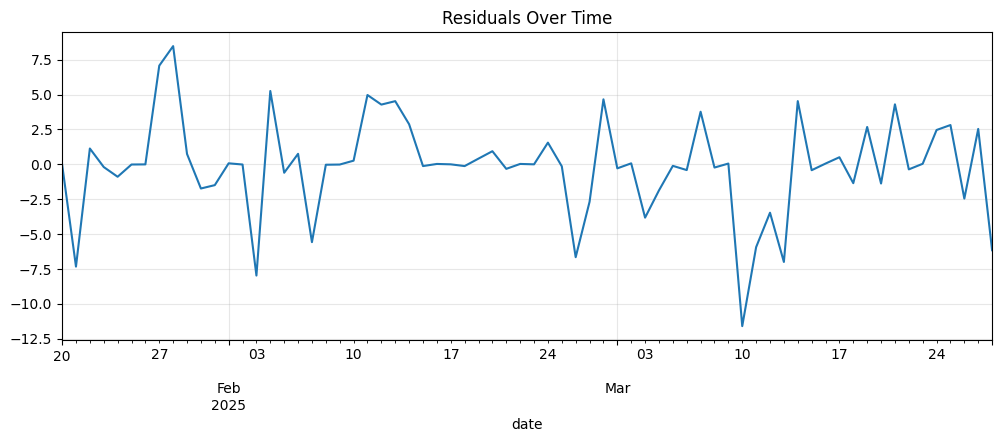

In [20]:
residuals = test - predictions

plt.figure(figsize=(12,4))
residuals.plot(title='Residuals Over Time')
plt.grid(alpha=0.3)
plt.show()


# 🔁 Set Residual Index and Recalculate for Accuracy


In [21]:

predictions = pd.Series(predictions, index=test.index)

residuals = test - predictions



# 📈 Residual Autocorrelation (ACF Plot)



<Figure size 1200x400 with 0 Axes>

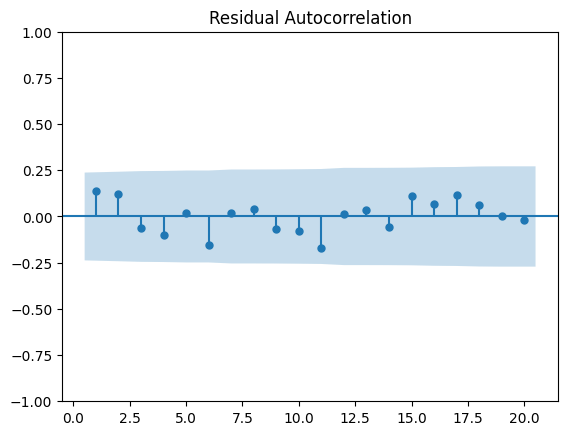

In [22]:
plt.figure(figsize=(12,4))
plot_acf(residuals, lags=20, zero=False)
plt.title('Residual Autocorrelation')
plt.show()


# Extra Residual ACF Plot as Array



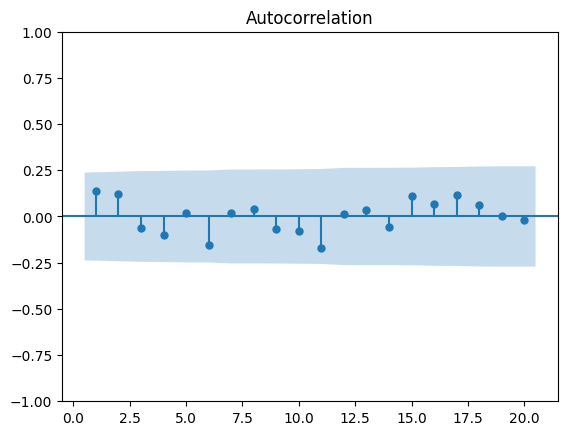

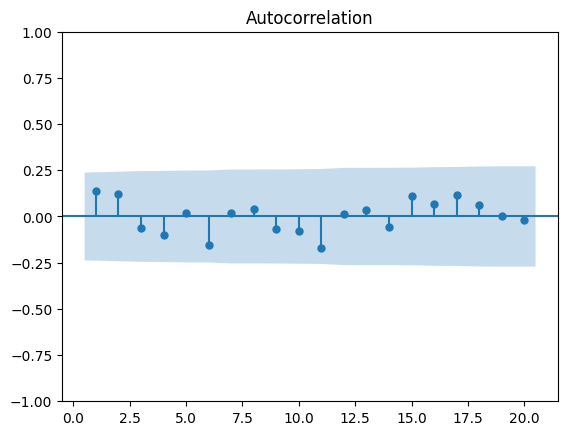

In [23]:
plot_acf(residuals.values, lags=20, zero=False)  

## 🧪 Normality Test of Residuals (D’Agostino and Pearson’s Test)



In [24]:
from scipy.stats import normaltest
_, p_value = normaltest(residuals)
print(f"\nNormality test p-value: {p_value:.4f}")
if p_value > 0.05:
    print("Residuals appear normally distributed")
else:
    print("Residuals NOT normally distributed")


Normality test p-value: 0.0187
Residuals NOT normally distributed


In [25]:
#complete arima forecast pipeline with model saving


import joblib 
from pathlib import Path
model_path = Path("../src/models/arima_111_aapl.pkl")
model_path.parent.mkdir(exist_ok=True)  
joblib.dump(model, model_path)
print(f"Model saved to {model_path}")



def load_and_forecast(model_path, new_data=None, steps=30):
    """Load saved model and make new forecasts"""
    model = joblib.load(model_path)
    
    if new_data is not None:
        updated_model = model.append(new_data)
    else:
        updated_model = model
    
    forecast = updated_model.forecast(steps=steps)
    return forecast

future_predictions = load_and_forecast(model_path)

Model saved to ..\src\models\arima_111_aapl.pkl
